In [1]:
"""
    Experimentation with neural networks on a datset of MRI covid/non-covid images.
    
    Created: 10/21/2020
    Author(s): Ben Flanders (brf97486)
    
    
    Potential source of getting all layer predictions: https://stackoverflow.com/questions/51677631/keras-tensorflow-get-predictions-or-output-of-all-layers-efficiently

"""

import cv2, random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import *

from DataHandler import dataHandler


In [2]:
dh = dataHandler() # data handler object. See DataHandler.py for more information.

# ALTER HYPERPARAMETERS HERE
BATCH_SIZE = 512




In [3]:
dataset = dh.get_all_data_labeled(shuffle=True)

In [4]:
# check that all data is in place
assert len(dh.get_non_covid_data_fp()) == 397 and len(dh.get_covid_data_fp()) == 349 and len(dh.get_all_data_labeled()) == (397 + 349)

In [5]:
datapoint = dataset[0] # get some datapoint from the dataset
random_img = cv2.imread(datapoint[0])

Label:  0.0
filepath:  /home/brf97486/COVID-19-CT-image-analysis-CSCI_8955/data/CT_NonCOVID/24.png
image dimensions:  (316, 512, 3)
image datatype:  uint8
image max:  255
image min


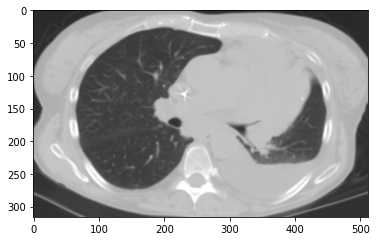

In [6]:
print("Label: ", datapoint[1])
print("filepath: ", datapoint[0])
print("image dimensions: ", random_img.shape)
print("image datatype: ", random_img.dtype)
print("image max: ", random_img.max())
print("image min")
plt.imshow(random_img)

In [7]:
# split the dataset into a train and test dataset

split_point = int(len(dataset) * .8 ) # 80 / 20 split

train_data = dataset[0:split_point]
test_data = dataset[split_point:]

assert len(train_data) + len(test_data) == (397 + 349) # ensure all expected data is present

train_data = train_data #+ train_data + train_data + train_data + train_data # when using the noise adder and random rotation then triple the datasets
random.shuffle(train_data)

In [8]:
# get the image data and load it into memory


train_X = np.asarray([dh.load_image(fp, resize=True, add_noise=True, randomly_rotate=True, grayscale=True) for (fp, label) in train_data]).astype('uint8')
train_y = np.asarray([label for (fp, label) in train_data]).astype('float16')

test_X = np.asarray([dh.load_image(fp, resize=True) for (fp, label) in test_data]).astype('uint8')
test_y = np.asarray([np.asarray(label) for (fp, label) in test_data]).astype('float16')

0
0
38
38
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
78
78
NEW IMAGE SHAPE:  (299, 299, 3)
52
53
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
42
42
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
62
63
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
73
73
NEW IMAGE SHAPE:  (299, 299, 3)
44
44
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
45
46
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
50
50
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
56
56
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
58
58
NEW IMAGE SHAPE:  (299, 299, 3)
50
50
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
1
1
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
47
48
NEW IMAGE SHAPE:  (299, 299, 3)
51
51
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
67
68
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
45
45
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
10
11
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
58
58
NEW IMAGE SHAPE:  (299, 299, 3)
51
52
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
41
41
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
34
35
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
32
32
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
56
56
NEW IMAGE SHAPE:  (299, 29

0
0
46
46
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
24
25
NEW IMAGE SHAPE:  (299, 299, 3)
53
53
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
51
51
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
36
36
NEW IMAGE SHAPE:  (299, 299, 3)
18
19
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
26
26
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
51
51
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
44
44
NEW IMAGE SHAPE:  (299, 299, 3)
56
56
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
51
52
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
62
63
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
45
45
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
57
57
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
54
54
NEW IMAGE SHAPE:  (299, 299, 3)
56
56
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
38
38
NEW IMAGE SHAPE:  (299, 299, 3)
25
25
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
56
57
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
46
47
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
38
38
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
36
36
NEW IMAGE SHAPE:  (299, 299, 3)
32
32
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
41
41
0
0
NEW IMAGE SHAPE:  (299, 

55
56
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
57
58
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
40
41
NEW IMAGE SHAPE:  (299, 299, 3)
67
67
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
71
71
NEW IMAGE SHAPE:  (299, 299, 3)
47
48
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
49
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
33
34
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
39
39
NEW IMAGE SHAPE:  (299, 299, 3)
45
46
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
48
48
NEW IMAGE SHAPE:  (299, 299, 3)
40
41
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
45
45
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
48
49
NEW IMAGE SHAPE:  (299, 299, 3)
37
37
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
38
39
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
56
57
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
42
43
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
52
53
NEW IMAGE SHAPE:  (299, 299, 3)
58
59
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
41
42
NEW IMAGE SHAPE:  (299, 299, 3)
40
41
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
0
0
48
49
NEW IMAGE SHAPE:  (299, 299, 3)
40
41
0
0
NEW IMAGE SHAPE:  (299, 

50
50
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
48
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
45
46
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
42
43
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
42
43
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
49
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
30
30
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
48
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
24
24
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
49
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
66
66
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
47
48
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
48
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
50
50
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
32
33
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
21
21
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
48
48
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
32
33
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
71
72
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
44
45
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
59
59
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
66
67
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
43
43
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
46
47
0
0
NEW IMAGE SHAPE:  (299, 

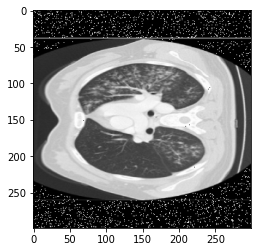

In [9]:
plt.imshow(train_X[0], cmap='gray')

In [10]:
#assert False

In [11]:
inception_model = tf.keras.applications.InceptionV3(weights='imagenet',include_top=False)
inception_model.trainable = False
x = inception_model.output
#x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu', dtype=tf.float32)(x)
x = Dropout(0.5)(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
prediction = Dense(1, activation='sigmoid', dtype=tf.float32)(x)


complete_model = tf.keras.Model(inputs=inception_model.input,outputs=prediction)

visualization_model = tf.keras.Model(inputs=inception_model.input, 
                                    outputs=[l.output for l in complete_model.layers[1:] if 'conv' in l.name])



complete_model.compile(optimizer='adam', loss=tf.keras.losses.BinaryCrossentropy(), metrics=tf.keras.metrics.BinaryAccuracy(),)

# just the very last layer should be trainable for now
complete_model.layers[len(complete_model.layers)-1].trainable = True




In [12]:
complete_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
visualization_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 3 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, None, None, 3 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, None, None, 3 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
complete_model.fit(x=train_X, y=train_y, batch_size=BATCH_SIZE, validation_data=(test_X, test_y), epochs=400, )

Epoch 1/400
2/2 [==============================] - 96s 48s/step - loss: 13.2483 - binary_accuracy: 0.4799 - val_loss: 11.0056 - val_binary_accuracy: 0.5800
Epoch 2/400
2/2 [==============================] - 0s 167ms/step - loss: 13.7462 - binary_accuracy: 0.5168 - val_loss: 2.4011 - val_binary_accuracy: 0.5333
Epoch 3/400
2/2 [==============================] - 0s 165ms/step - loss: 5.5649 - binary_accuracy: 0.4597 - val_loss: 4.8011 - val_binary_accuracy: 0.4133
Epoch 4/400
2/2 [==============================] - 0s 163ms/step - loss: 4.0782 - binary_accuracy: 0.5151 - val_loss: 2.0196 - val_binary_accuracy: 0.4333
Epoch 5/400
2/2 [==============================] - 0s 164ms/step - loss: 2.2556 - binary_accuracy: 0.5302 - val_loss: 0.9194 - val_binary_accuracy: 0.5000
Epoch 6/400
2/2 [==============================] - 0s 165ms/step - loss: 1.5143 - binary_accuracy: 0.5872 - val_loss: 0.8273 - val_binary_accuracy: 0.5533
Epoch 7/400
2/2 [==============================] - 0s 164ms/step - l

2/2 [==============================] - 0s 168ms/step - loss: 0.6258 - binary_accuracy: 0.6242 - val_loss: 0.6980 - val_binary_accuracy: 0.5000
Epoch 54/400
2/2 [==============================] - 0s 168ms/step - loss: 0.5965 - binary_accuracy: 0.6527 - val_loss: 0.6974 - val_binary_accuracy: 0.5000
Epoch 55/400
2/2 [==============================] - 0s 167ms/step - loss: 0.6137 - binary_accuracy: 0.6040 - val_loss: 0.6968 - val_binary_accuracy: 0.5200
Epoch 56/400
2/2 [==============================] - 0s 167ms/step - loss: 0.6209 - binary_accuracy: 0.6460 - val_loss: 0.6963 - val_binary_accuracy: 0.5400
Epoch 57/400
2/2 [==============================] - 0s 167ms/step - loss: 0.6012 - binary_accuracy: 0.6527 - val_loss: 0.6962 - val_binary_accuracy: 0.5400
Epoch 58/400
2/2 [==============================] - 0s 167ms/step - loss: 0.6120 - binary_accuracy: 0.6393 - val_loss: 0.6966 - val_binary_accuracy: 0.5333
Epoch 59/400
2/2 [==============================] - 0s 167ms/step - loss: 0.6

2/2 [==============================] - 0s 163ms/step - loss: 0.5621 - binary_accuracy: 0.7013 - val_loss: 0.6910 - val_binary_accuracy: 0.5200
Epoch 106/400
2/2 [==============================] - 0s 166ms/step - loss: 0.5656 - binary_accuracy: 0.7030 - val_loss: 0.6898 - val_binary_accuracy: 0.5467
Epoch 107/400
2/2 [==============================] - 0s 169ms/step - loss: 0.5707 - binary_accuracy: 0.6829 - val_loss: 0.6895 - val_binary_accuracy: 0.5800
Epoch 108/400
2/2 [==============================] - 0s 165ms/step - loss: 0.5448 - binary_accuracy: 0.6879 - val_loss: 0.6903 - val_binary_accuracy: 0.6133
Epoch 109/400
2/2 [==============================] - 0s 167ms/step - loss: 0.5753 - binary_accuracy: 0.6913 - val_loss: 0.6889 - val_binary_accuracy: 0.6067
Epoch 110/400
2/2 [==============================] - 0s 167ms/step - loss: 0.5572 - binary_accuracy: 0.6896 - val_loss: 0.6861 - val_binary_accuracy: 0.6000
Epoch 111/400
2/2 [==============================] - 0s 168ms/step - los

2/2 [==============================] - 0s 169ms/step - loss: 0.4763 - binary_accuracy: 0.7383 - val_loss: 0.6779 - val_binary_accuracy: 0.6067
Epoch 158/400
2/2 [==============================] - 0s 168ms/step - loss: 0.4830 - binary_accuracy: 0.7416 - val_loss: 0.6806 - val_binary_accuracy: 0.6067
Epoch 159/400
2/2 [==============================] - 0s 167ms/step - loss: 0.4928 - binary_accuracy: 0.7315 - val_loss: 0.6861 - val_binary_accuracy: 0.5800
Epoch 160/400
2/2 [==============================] - 0s 169ms/step - loss: 0.4918 - binary_accuracy: 0.7383 - val_loss: 0.6942 - val_binary_accuracy: 0.5867
Epoch 161/400
2/2 [==============================] - 0s 168ms/step - loss: 0.4742 - binary_accuracy: 0.7550 - val_loss: 0.7035 - val_binary_accuracy: 0.5867
Epoch 162/400
2/2 [==============================] - 0s 164ms/step - loss: 0.5021 - binary_accuracy: 0.7265 - val_loss: 0.7161 - val_binary_accuracy: 0.5867
Epoch 163/400
2/2 [==============================] - 0s 165ms/step - los

2/2 [==============================] - 0s 170ms/step - loss: 0.4411 - binary_accuracy: 0.7785 - val_loss: 0.7000 - val_binary_accuracy: 0.6200
Epoch 210/400
2/2 [==============================] - 0s 165ms/step - loss: 0.4212 - binary_accuracy: 0.7953 - val_loss: 0.7047 - val_binary_accuracy: 0.6200
Epoch 211/400
2/2 [==============================] - 0s 167ms/step - loss: 0.4015 - binary_accuracy: 0.7987 - val_loss: 0.7154 - val_binary_accuracy: 0.6267
Epoch 212/400
2/2 [==============================] - 0s 167ms/step - loss: 0.4311 - binary_accuracy: 0.7701 - val_loss: 0.7257 - val_binary_accuracy: 0.6133
Epoch 213/400
2/2 [==============================] - 0s 166ms/step - loss: 0.4108 - binary_accuracy: 0.8003 - val_loss: 0.7290 - val_binary_accuracy: 0.6133
Epoch 214/400
2/2 [==============================] - 0s 166ms/step - loss: 0.4337 - binary_accuracy: 0.7970 - val_loss: 0.7268 - val_binary_accuracy: 0.6000
Epoch 215/400
2/2 [==============================] - 0s 168ms/step - los

2/2 [==============================] - 0s 168ms/step - loss: 0.3956 - binary_accuracy: 0.7836 - val_loss: 0.7348 - val_binary_accuracy: 0.5933
Epoch 262/400
2/2 [==============================] - 0s 167ms/step - loss: 0.3966 - binary_accuracy: 0.8104 - val_loss: 0.7229 - val_binary_accuracy: 0.5933
Epoch 263/400
2/2 [==============================] - 0s 170ms/step - loss: 0.3954 - binary_accuracy: 0.7987 - val_loss: 0.7156 - val_binary_accuracy: 0.6133
Epoch 264/400
2/2 [==============================] - 0s 169ms/step - loss: 0.3745 - binary_accuracy: 0.8255 - val_loss: 0.7151 - val_binary_accuracy: 0.6000
Epoch 265/400
2/2 [==============================] - 0s 167ms/step - loss: 0.3927 - binary_accuracy: 0.8087 - val_loss: 0.7142 - val_binary_accuracy: 0.6133
Epoch 266/400
2/2 [==============================] - 0s 169ms/step - loss: 0.3938 - binary_accuracy: 0.8087 - val_loss: 0.7097 - val_binary_accuracy: 0.6067
Epoch 267/400
2/2 [==============================] - 0s 166ms/step - los

2/2 [==============================] - 0s 169ms/step - loss: 0.3343 - binary_accuracy: 0.8523 - val_loss: 0.7734 - val_binary_accuracy: 0.6000
Epoch 314/400
2/2 [==============================] - 0s 165ms/step - loss: 0.3071 - binary_accuracy: 0.8641 - val_loss: 0.7782 - val_binary_accuracy: 0.5933
Epoch 315/400
2/2 [==============================] - 0s 166ms/step - loss: 0.3473 - binary_accuracy: 0.8440 - val_loss: 0.8067 - val_binary_accuracy: 0.6067
Epoch 316/400
2/2 [==============================] - 0s 169ms/step - loss: 0.3174 - binary_accuracy: 0.8473 - val_loss: 0.8417 - val_binary_accuracy: 0.6267
Epoch 317/400
2/2 [==============================] - 0s 169ms/step - loss: 0.3315 - binary_accuracy: 0.8305 - val_loss: 0.8432 - val_binary_accuracy: 0.6067
Epoch 318/400
2/2 [==============================] - 0s 167ms/step - loss: 0.3252 - binary_accuracy: 0.8356 - val_loss: 0.8389 - val_binary_accuracy: 0.6067
Epoch 319/400
2/2 [==============================] - 0s 166ms/step - los

2/2 [==============================] - 0s 168ms/step - loss: 0.3272 - binary_accuracy: 0.8389 - val_loss: 0.8210 - val_binary_accuracy: 0.6133
Epoch 366/400
2/2 [==============================] - 0s 168ms/step - loss: 0.2900 - binary_accuracy: 0.8641 - val_loss: 0.8280 - val_binary_accuracy: 0.6267
Epoch 367/400
2/2 [==============================] - 0s 166ms/step - loss: 0.3096 - binary_accuracy: 0.8557 - val_loss: 0.8348 - val_binary_accuracy: 0.6333
Epoch 368/400
2/2 [==============================] - 0s 169ms/step - loss: 0.3093 - binary_accuracy: 0.8591 - val_loss: 0.8313 - val_binary_accuracy: 0.6067
Epoch 369/400
2/2 [==============================] - 0s 169ms/step - loss: 0.3097 - binary_accuracy: 0.8456 - val_loss: 0.8401 - val_binary_accuracy: 0.6400
Epoch 370/400
2/2 [==============================] - 0s 170ms/step - loss: 0.3119 - binary_accuracy: 0.8523 - val_loss: 0.8287 - val_binary_accuracy: 0.6533
Epoch 371/400
2/2 [==============================] - 0s 167ms/step - los

In [15]:
# now fine tune the inception model itself
inception_model.trainable = True
complete_model.fit(x=train_X, y=train_y, batch_size=BATCH_SIZE, validation_data=(test_X, test_y), epochs=50)

Epoch 1/50
2/2 [==============================] - 0s 179ms/step - loss: 0.3031 - binary_accuracy: 0.8691 - val_loss: 0.9701 - val_binary_accuracy: 0.6067
Epoch 2/50
2/2 [==============================] - 0s 166ms/step - loss: 0.3197 - binary_accuracy: 0.8523 - val_loss: 0.9753 - val_binary_accuracy: 0.5933
Epoch 3/50
2/2 [==============================] - 0s 167ms/step - loss: 0.2952 - binary_accuracy: 0.8540 - val_loss: 0.9462 - val_binary_accuracy: 0.6200
Epoch 4/50
2/2 [==============================] - 0s 168ms/step - loss: 0.2951 - binary_accuracy: 0.8641 - val_loss: 0.9276 - val_binary_accuracy: 0.5867
Epoch 5/50
2/2 [==============================] - 0s 167ms/step - loss: 0.2621 - binary_accuracy: 0.8658 - val_loss: 0.9209 - val_binary_accuracy: 0.6067
Epoch 6/50
2/2 [==============================] - 0s 168ms/step - loss: 0.2755 - binary_accuracy: 0.8758 - val_loss: 0.9264 - val_binary_accuracy: 0.5933
Epoch 7/50
2/2 [==============================] - 0s 168ms/step - loss: 0.28

In [16]:
conv_lays = []

count = 0
    
for lay in complete_model.layers:
    if 'conv' in lay.name:
        conv_layer = lay
        conv_lays.append(lay)
        
print("Number of convolution layers: ", len(conv_lays))

Number of convolution layers:  94


In [17]:
kernel_images = conv_layer.kernel

(1, 1, 2048, 192)


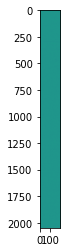

In [18]:
print(kernel_images.shape)

plt.imshow(kernel_images[0][0])

In [19]:

datapoint = test_data[len(test_data)-1]

img_data = np.asarray([dh.load_image(datapoint[0], resize=True)]).astype('uint8')

print("datapoint label: ", datapoint[1])
print("model prediction: ", complete_model.predict(img_data))

all_layer_outputs = visualization_model.predict(img_data)

43
43
0
0
NEW IMAGE SHAPE:  (299, 299, 3)
datapoint label:  0.0
model prediction:  [[0.12379876]]


In [20]:

for l in inception_layer.layers[2:]:
    if 'conv' in l.name:
        print(l.output) 


NameError: name 'inception_layer' is not defined

In [ ]:
layer_0_conv_out = all_layer_outputs[93][0]
layer_0_conv_out.shape
plt.imshow(layer_0_conv_out[:,:,0])